# Boehringer Ingelheim Group 1 MVP


# Introduction 

This Jupyter notebook acts as the MVP for the COMP3850 Computing Industry Project and we will include any code or research done in here.


## Research

Due to the nature of the project, we will be exploring using python code to try determine some business insights for BI with their given sales data.

### Feedback 1
Check for outliers
Heteroscdasiticy
Assumption Testing
0's in units
Shape of data
Transformations

Check C&S Vs Pets cause C&S is meant to be equal to pets. (Data Visualisation)

Forecasting future market changes. Look at changes that happen and tell them how we think we can sell in the future. Long term forecast.

Forecast down to category levels.

What's recovery look like for Cattle & Sheep.


Previous 3 years of data with drought. How will that affect the data.


2020 remarkable year for pets. What is going to look like after.

Vet visits went up. Cause people noticed more issues with pets.

Up to 3 million new pets in the business

# Aims

**MAIN GOALS :**

**Where should Boehringer Ingelheim focus their sales efforts to.**

From the main goal, we can break it into smaller components.

**SUB-GOALS :**

1) Which business unit has been performing so far ( Can be done graphically )

2) Modelling to be done for predicted level of sales


# Our Approach

To answer our hypothesis, we are using the following approach.

1) Data preparation: load and transform the data as preparation for the analysis

2) Answering sub-hypothesis 1 through exploration and visualtisation of the dataset

3) Answering sub-hypothesis 2 through creating models in order to try to predict sales levels

# Packages

In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats
from scipy.stats import pearsonr
from numpy.polynomial.polynomial import polyfit
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from matplotlib.pyplot import imread
from sklearn import preprocessing

#To remove the red box errors just to make the notebook look neater
import warnings
warnings.filterwarnings("ignore")

# 1. Dataset and Dataframe Manipulation

## 1.1. Sales Data

We have combined and cleaned the data from excel and are going to load the current data set as of April 6th into various DataFrames.

We will conduct our exploration and analysis on this dataset

**Data Cleaning and Manipulation**

In [2]:
# Import the Distribution/Sales Data into Jupyter
eastern = pd.read_csv("Data Extract/CSV/EASTERN-DATA-COMBINED.csv")
western = pd.read_csv("Data Extract/CSV/WESTERN-COMBINED-DATA.csv")
combined = pd.read_csv("Data Extract/CSV/RENAME-CONSOLIDATED-DATA-COMBINED.csv") 
market = pd.read_csv("Data Extract/CSV/PACE students - market data (confidential).csv")
wholesaler_to_retail = pd.read_csv("Data Extract/CSV/PACE students - wholesaler to retail.csv",encoding='cp1252')

In [3]:
wholesaler_to_retail.columns

Index(['Year', 'Month', 'Distributors Name', 'CUSTOMER ID', 'Postcode',
       'WHS_SKU_ID', 'Suppliercode', 'Product', 'Quantity', 'Price'],
      dtype='object')

In [4]:
txt = " 'VENDOR','SHIPDATE','ORDERKEY','CONSIGNEEKEY','C_COMPANY','C_ZIP','EXTERNORDERKEY','SKU','ORIGINALQTY','SHIPPEDQTY' "
print(txt.lower())

 'vendor','shipdate','orderkey','consigneekey','c_company','c_zip','externorderkey','sku','originalqty','shippedqty' 


**Aggregating data**

Market Data

In [49]:
market_drop = market.drop(['CalYr','MAT', 'YTD',
       'Brand', 'Product', 'ProductCode',
       'ProductionCompanion', 'Region', 'Units', 'Units ADJ', 'Doses',
       'Manufacturer ADJ', 'Brand ADJ', 'Product ADJ',
       'SubCategory3.1', 'Species ADJ', 'Doses ADJ',
       'Doses / Unit', 'Monthly Doses',
       'BI Market Only FLG'],axis = 1).dropna()

In [50]:
market_drop.columns

Index(['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3',
       'Species', 'Value', 'YEAR', 'BI Business Unit'],
      dtype='object')

In [51]:
# Merge data to Period with Units sold
market_drop_unit = market_drop.groupby(['Period','Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3', 'Species',
       'YEAR', 'BI Business Unit']).sum().reset_index()
market_drop_unit

,Period,Qtr,Manufacturer,SubCategory2,SubCategory3,Species,YEAR,BI Business Unit,Value
0,2018-01,Mar-18,Bayer,Alimentary System,Antidiarrhoeals,Cattle & Cat & Dog & Horse,2018,No Bus,25510.00
1,2018-01,Mar-18,Bayer,Anaesthetics,Anaesthetics Local & General,Cattle & Sheep,2018,Cattle & Sheep,74344.00
2,2018-01,Mar-18,Bayer,Anaesthetics,Anaesthetics Local & General,Sheep,2018,Cattle & Sheep,2120.00
3,2018-01,Mar-18,Bayer,Antibiotics,Antibiotics Oral - Companion,Cat,2018,Pets,1050.00
4,2018-01,Mar-18,Bayer,Antibiotics,Antibiotics Oral - Companion,Cat & Dog,2018,Pets,31783.45
...,...,...,...,...,...,...,...,...,...
15859,2020-12,Dec-20,Zoetis,Vaccines & Antisera,Vaccines Other,Other,2020,No Bus,241116.48
15860,2020-12,Dec-20,Zoetis,Vaccines & Antisera,Vaccines Pig,Pig,2020,Swine,1290803.56
15861,2020-12,Dec-20,Zoetis,Vaccines & Antisera,"Vaccines Sheep, Goat, Cattle",Cattle,2020,Cattle & Sheep,4156440.92
15862,2020-12,Dec-20,Zoetis,Vaccines & Antisera,"Vaccines Sheep, Goat, Cattle",Pig,2020,Swine,508284.39


Wholesaler to Retail

In [45]:
wholesaler_to_retail.head()

,Year,Month,Distributors Name,CUSTOMER ID,Postcode,WHS_SKU_ID,Suppliercode,Product,Quantity,Price
0,2020.0,June,Eastern Distributors,AU924404,3079,WSLDB3,CA472075WAL,SENTINEL LARGE DOG 22 - 45KG BLUE 3 CHEWS,6.0,56.401100
1,2020.0,June,Eastern Distributors,AU924404,3079,WSLDB6,CA472083WALZ1,SENTINEL LARGE DOG 22 - 45KG BLUE 6 CHEWS,2.0,99.507053
2,2020.0,June,Eastern Distributors,AU924404,3079,WSMDY6,CA472583WALZ1,SENTINEL MEDIUM DOG 11 - 22KG YELLOW 6 CHEWS,3.0,91.334903
3,2020.0,June,Eastern Distributors,AU924404,3079,WSSDG6,CA473083WAL,SENTINEL SMALL DOG 4 - 11KG GREEN 6 CHEWS,6.0,84.136057
4,2020.0,June,Eastern Distributors,AU924404,3079,WACS6,04506700,ADVANTAGE CAT 0-4KG SMALL 6'S ORANGE,1.0,50.102048


In [7]:
wholesaler_to_retail.columns

Index(['Year', 'Month', 'Distributors Name', 'CUSTOMER ID', 'Postcode',
       'WHS_SKU_ID', 'Suppliercode', 'Product', 'Quantity', 'Price'],
      dtype='object')

In [8]:
wholesaler_to_retail_drop = wholesaler_to_retail.drop(['WHS_SKU_ID', 'Suppliercode', 'Product'],axis =1)
wholesaler_to_retail_drop = wholesaler_to_retail_drop.dropna()
wholesaler_to_retail_drop

,Year,Month,Distributors Name,CUSTOMER ID,Postcode,Quantity,Price
0,2020.0,June,Eastern Distributors,AU924404,3079,6.0,56.401100
1,2020.0,June,Eastern Distributors,AU924404,3079,2.0,99.507053
2,2020.0,June,Eastern Distributors,AU924404,3079,3.0,91.334903
3,2020.0,June,Eastern Distributors,AU924404,3079,6.0,84.136057
4,2020.0,June,Eastern Distributors,AU924404,3079,1.0,50.102048
...,...,...,...,...,...,...,...
144505,2020.0,May,Western Distributors,AU923112,3840,12.0,10.600000
144511,2020.0,May,Western Distributors,In Google,2756,6.0,69.360000
144512,2020.0,May,Western Distributors,In Google,2756,6.0,69.360000
144513,2020.0,May,Western Distributors,In Google,2756,5.0,69.360000


# 2. Data Visualisation / Exploration

According to For Dummies, a correlation coefficient can be interpreted this way:

A positive (uphill) relationship: the variables move together.

Exactly 1 is a perfect relationship
Between 0.70 and 1 is a strong relationship
Between 0.50 and 0.70 is a moderate relationship
Between 0.30 and 0.50 is a weak relationship
A negative (downhill) relationship: the variables move opposite to each other.

Exactly -1 is a perfect relationship
Between -0.70 and -1 is a strong relationship
Between -0.50 and -0.70 is a moderate relationship
Between -0.30 and -0.50 is a weak relationship
A correlation score between -0.30 and +0.30 shows no relationship.

### 2.1. Business Units

<AxesSubplot:xlabel='Period'>

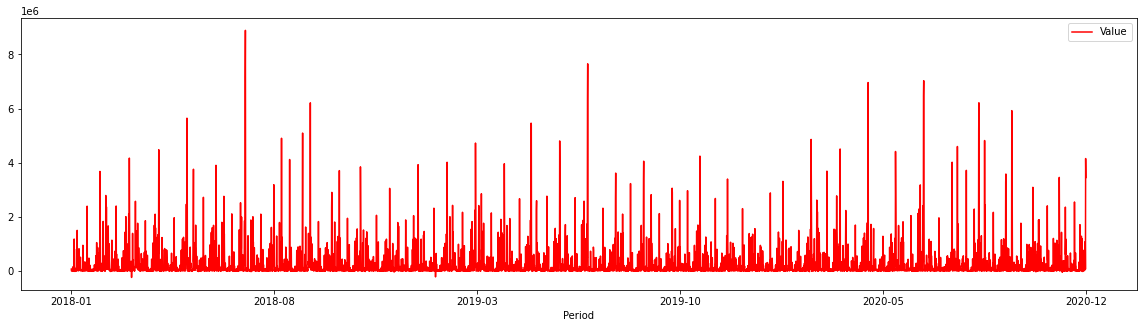

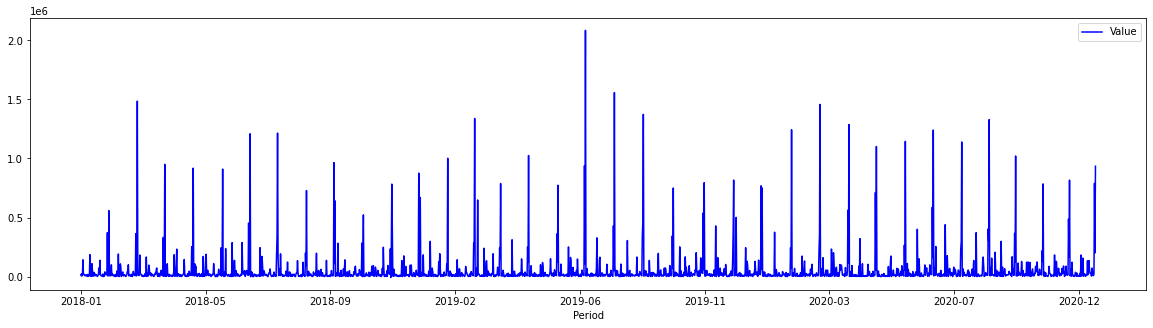

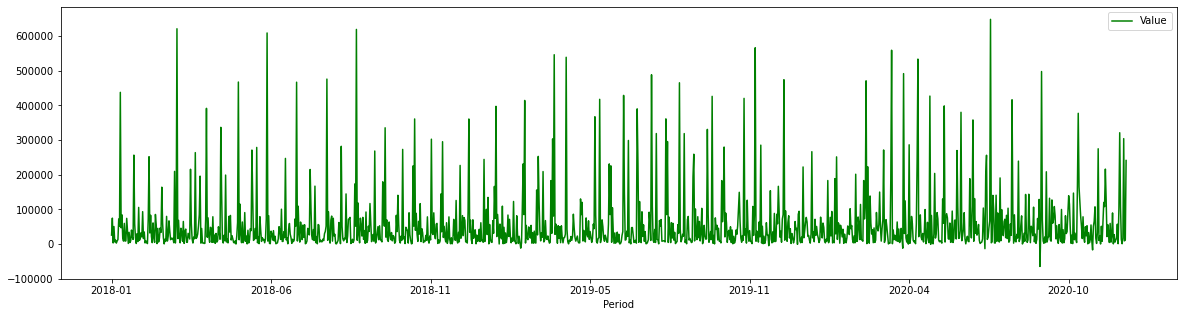

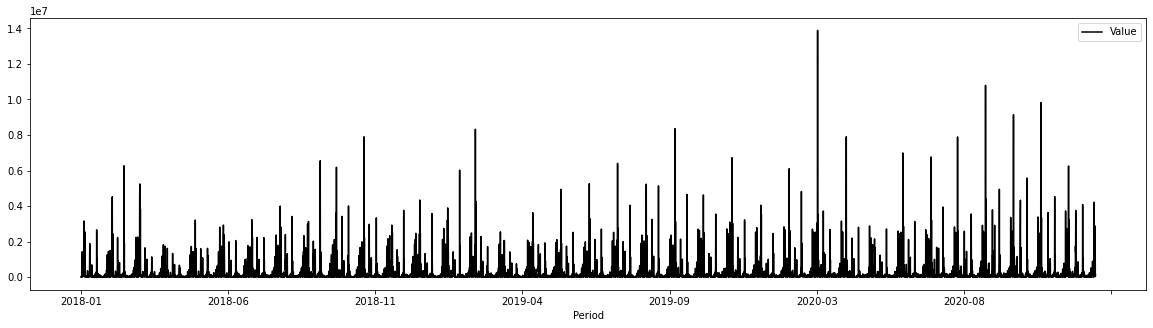

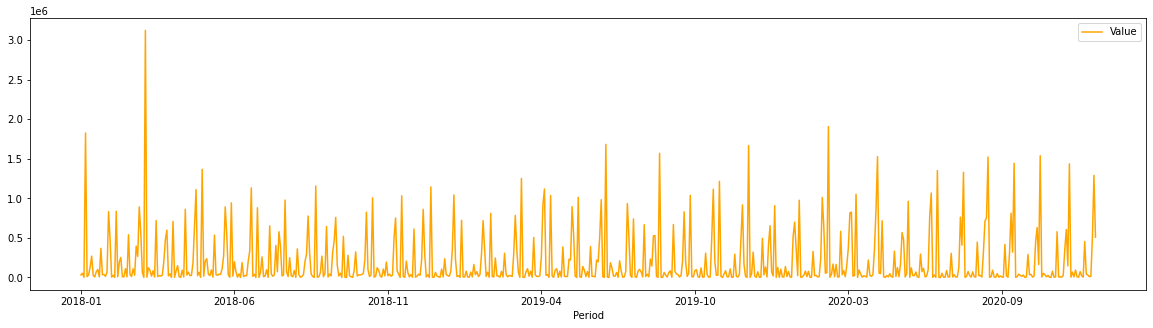

In [52]:
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep'].plot(x='Period',y='Value',figsize=(20,5),c = "red")
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine'].plot(x='Period',y='Value',figsize=(20,5),c = "blue")
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus'].plot(x='Period',y='Value',figsize=(20,5),c = "green")
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Pets'].plot(x='Period',y='Value',figsize=(20,5),c = "black")
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine'].plot(x='Period',y='Value',figsize=(20,5),c = "orange")

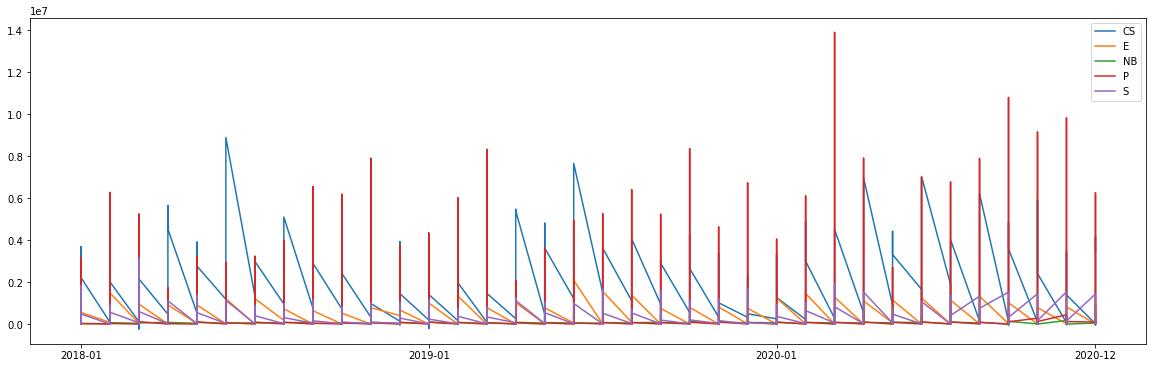

In [56]:
x1 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep']['Period']
y1 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep']['Value']
x2 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine']['Period']
y2 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine']['Value']
x3 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus']['Period']
y3 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus']['Value']
x4 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Pets']['Period']
y4 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Pets']['Value']
x5 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine']['Period']
y5 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine']['Value']
x_tick = ['2018-01', '2019-01', '2020-01', '2020-12']
plt.figure(figsize=(20, 6))
plt.plot(x1, y1,label ="CS")
plt.plot(x2, y2,label ="E")
plt.plot(x3, y3,label ="NB")
plt.plot(x4, y4,label ="P")
plt.plot(x5, y5,label ="S")
plt.xticks(x_tick)

plt.legend()

From the combined sales graph, we can observe that Pets are overwhelmingly larger in terms of sales of products. However, we need to also understand that this plot does not have the distinction between products and their associated usage. But let's observe the trends in the sales for the other units except pets

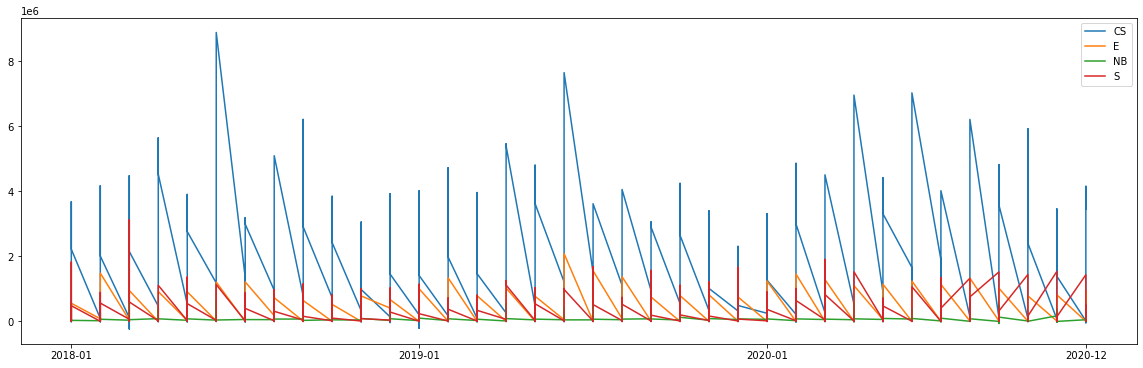

In [57]:
x1 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep']['Period']
y1 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep']['Value']
x2 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine']['Period']
y2 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine']['Value']
x3 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus']['Period']
y3 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus']['Value']
x5 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine']['Period']
y5 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine']['Value']
x_tick = ['2018-01', '2019-01', '2020-01', '2020-12']
plt.figure(figsize=(20, 6))
plt.plot(x1, y1,label ="CS")
plt.plot(x2, y2,label ="E")
plt.plot(x3, y3,label ="NB")
plt.plot(x5, y5,label ="S")
plt.xticks(x_tick)

plt.legend()

### Scatterplot Matrix

# 3. Modelling

### 3.1. Based on Market Data, predictions on future sales

#### Use Linear Regression to find the most "impactful" variable to units sold

# MISSING ASSUMPTION TESTING
- Heteroskedasticity
- Normality Assumption
- Independance of variables (Period, Qtr and CalYr have strong relation)

Convert Categorical Strings into float variables

In [59]:
market_drop.columns

Index(['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3',
       'Species', 'Value', 'YEAR', 'BI Business Unit'],
      dtype='object')

In [61]:
Period = market_drop['Period']
Period_Unique = Period.unique()

Qtr = market_drop['Qtr']
Qtr_Unique = Qtr.unique()

Manufacturer = market_drop['Manufacturer']
Manufacturer_Unique = Manufacturer.unique()

SubCategory2 = market_drop['SubCategory2']
SubCategory2_Unique = SubCategory2.unique()

SubCategory3 = market_drop['SubCategory3']
SubCategory3_Unique = SubCategory3.unique()

Species = market_drop['Species']
Species_Unique = Species.unique()

BI_Business_Unit = market_drop['BI Business Unit']
BI_Business_Unit_Unique = BI_Business_Unit.unique()

In [62]:
le = preprocessing.LabelEncoder()

le.fit(Period_Unique)
arr1 = le.transform(Period)

le.fit(Qtr_Unique)
arr2 = le.transform(Qtr)

le.fit(Manufacturer_Unique)
arr3 = le.transform(Manufacturer)

le.fit(SubCategory2_Unique)
arr4 = le.transform(SubCategory2)

le.fit(SubCategory3_Unique)
arr5 = le.transform(SubCategory3)

le.fit(Species_Unique)
arr6 = le.transform(Species)

le.fit(BI_Business_Unit_Unique)
arr7 = le.transform(BI_Business_Unit)

In [64]:
market_drop_model = pd.DataFrame({'Period':arr1,'Qtr':arr2, 'Manufacturer':arr3, 'SubCategory2':arr4,'SubCategory3':arr5,'Species':arr6,'BI Business Unit':arr7,'Year':market_drop['YEAR'],'Value':market_drop['Value'].astype(int)})

In [65]:
market_drop_model.columns

Index(['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3',
       'Species', 'BI Business Unit', 'Year', 'Value'],
      dtype='object')

In [67]:
X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3',
       'Species', 'BI Business Unit', 'Year']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [68]:
# Obtain MSE and r2 for testing data
y_test_pred = model.predict(X_test)
print("Checking testing values")
print("MSE: ", mean_squared_error(y_test,y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
MSE:  2787556907.832338
R2: 0.0142817936330214


Now we are individually testing the logistic regression with the individual variables to see which variables are the best predictors.

In [70]:
X = market_drop_model[['Period']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
print("Checking testing values")
print("MSE: ", mean_squared_error(y_test,y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
MSE:  2827480285.1849403
R2: 0.00016434196573988924


In [71]:
X = market_drop_model[['Qtr']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
print("Checking testing values")
print("MSE: ", mean_squared_error(y_test,y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
MSE:  2827983979.738761
R2: -1.3771309994137226e-05


In [72]:
X = market_drop_model[['Manufacturer']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
print("Checking testing values")
print("MSE: ", mean_squared_error(y_test,y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
MSE:  2828110725.4698734
R2: -5.8590332122632205e-05


In [73]:
X = market_drop_model[['SubCategory2']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
print("Checking testing values")
print("MSE: ", mean_squared_error(y_test,y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
MSE:  2790184767.2469006
R2: 0.013352546642070418


In [74]:
X = market_drop_model[['SubCategory3']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
print("Checking testing values")
print("MSE: ", mean_squared_error(y_test,y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
MSE:  2805996043.1908584
R2: 0.007761463453755835


In [75]:
X = market_drop_model[['Species']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
print("Checking testing values")
print("MSE: ", mean_squared_error(y_test,y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
MSE:  2822167241.874232
R2: 0.002043106667499628


In [76]:
X = market_drop_model[['BI Business Unit']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
print("Checking testing values")
print("MSE: ", mean_squared_error(y_test,y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
MSE:  2824953228.775906
R2: 0.0010579436367595951


In [77]:
X = market_drop_model[['Year']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
print("Checking testing values")
print("MSE: ", mean_squared_error(y_test,y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
MSE:  2827509912.999794
R2: 0.00015386516563076214


The linear regression can be our baseline model and now we will try the KNN model to see if there is a difference and carry on the same procedure.

In [90]:
X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3',
       'Species', 'BI Business Unit', 'Year']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)

from sklearn.neighbors import KNeighborsClassifier
K_Neighbour = KNeighborsClassifier(n_neighbors=1)

K_Neighbour.fit(X_train,y_train)
y_trainpred = K_Neighbour.predict(X_train)
y_testpred = K_Neighbour.predict(X_test)
print('The accuracy of the training with all the variables KNearestNeighbour model is : ', accuracy_score(y_train, y_trainpred))
print('The accuracy of the testing with all the variables KNearestNeighbour model is : ', accuracy_score(y_test, y_testpred))

The accuracy of the training with all the variables KNearestNeighbour model is :  0.14016274046913457
The accuracy of the testing with all the variables KNearestNeighbour model is :  0.017491869357208333


In [82]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['Period']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_trainpred = K_Neighbour.predict(X_train)
y_testpred = K_Neighbour.predict(X_test)
print('The accuracy of the training with Period KNearestNeighbour model is : ', accuracy_score(y_train, y_trainpred))
print('The accuracy of the testing with Period KNearestNeighbour model is : ', accuracy_score(y_test, y_testpred))

The accuracy of the training with Period KNearestNeighbour model is :  0.0006111139015855476
The accuracy of the testing with Period KNearestNeighbour model is :  0.00035159536396398656


In [83]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['Qtr']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_trainpred = K_Neighbour.predict(X_train)
y_testpred = K_Neighbour.predict(X_test)
print('The accuracy of the training with Qtr KNearestNeighbour model is : ', accuracy_score(y_train, y_trainpred))
print('The accuracy of the testing with Qtr KNearestNeighbour model is : ', accuracy_score(y_test, y_testpred))

The accuracy of the training with Qtr KNearestNeighbour model is :  0.00019254273611599444
The accuracy of the testing with Qtr KNearestNeighbour model is :  0.00010045581827542474


In [84]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['Manufacturer']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_trainpred = K_Neighbour.predict(X_train)
y_testpred = K_Neighbour.predict(X_test)
print('The accuracy of the training with Manufacturer KNearestNeighbour model is : ', accuracy_score(y_train, y_trainpred))
print('The accuracy of the testing with Manufacturer KNearestNeighbour model is : ', accuracy_score(y_test, y_testpred))

The accuracy of the training with Manufacturer KNearestNeighbour model is :  0.0004520568587071174
The accuracy of the testing with Manufacturer KNearestNeighbour model is :  0.0003139244321107023


In [85]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['SubCategory2']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_trainpred = K_Neighbour.predict(X_train)
y_testpred = K_Neighbour.predict(X_test)
print('The accuracy of the training with SubCategory2 KNearestNeighbour model is : ', accuracy_score(y_train, y_trainpred))
print('The accuracy of the testing with SubCategory2 KNearestNeighbour model is : ', accuracy_score(y_test, y_testpred))

The accuracy of the training with SubCategory2 KNearestNeighbour model is :  0.0006111139015855476
The accuracy of the testing with SubCategory2 KNearestNeighbour model is :  0.0004771651368082675


In [86]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['SubCategory3']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_trainpred = K_Neighbour.predict(X_train)
y_testpred = K_Neighbour.predict(X_test)
print('The accuracy of the training with SubCategory3 KNearestNeighbour model is : ', accuracy_score(y_train, y_trainpred))
print('The accuracy of the testing with SubCategory3 KNearestNeighbour model is : ', accuracy_score(y_test, y_testpred))

The accuracy of the training with SubCategory3 KNearestNeighbour model is :  0.0016826560851876035
The accuracy of the testing with SubCategory3 KNearestNeighbour model is :  0.0012305837738739531


In [87]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['Species']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_trainpred = K_Neighbour.predict(X_train)
y_testpred = K_Neighbour.predict(X_test)
print('The accuracy of the training with Species KNearestNeighbour model is : ', accuracy_score(y_train, y_trainpred))
print('The accuracy of the testing with Species KNearestNeighbour model is : ', accuracy_score(y_test, y_testpred))

The accuracy of the training with Species KNearestNeighbour model is :  0.0007785423677733688
The accuracy of the testing with Species KNearestNeighbour model is :  0.0007408616597812575


In [88]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['BI Business Unit']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_trainpred = K_Neighbour.predict(X_train)
y_testpred = K_Neighbour.predict(X_test)
print('The accuracy of the training with BI Business Unit KNearestNeighbour model is : ', accuracy_score(y_train, y_trainpred))
print('The accuracy of the testing with BI Business Unit KNearestNeighbour model is : ', accuracy_score(y_test, y_testpred))

The accuracy of the training with BI Business Unit KNearestNeighbour model is :  0.00024277127597234082
The accuracy of the testing with BI Business Unit KNearestNeighbour model is :  0.00020091163655084948


In [89]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['Year']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_trainpred = K_Neighbour.predict(X_train)
y_testpred = K_Neighbour.predict(X_test)
print('The accuracy of the training with Year KNearestNeighbour model is : ', accuracy_score(y_train, y_trainpred))
print('The accuracy of the testing with Year KNearestNeighbour model is : ', accuracy_score(y_test, y_testpred))

The accuracy of the training with Year KNearestNeighbour model is :  2.5114269928173187e-05
The accuracy of the testing with Year KNearestNeighbour model is :  0.0


#### Logistic Regression

In [15]:
market.columns

Index(['Period', 'MAT', 'YTD', 'Qtr', 'CalYr', 'Manufacturer', 'SubCategory2',
       'SubCategory3', 'Brand', 'Product', 'ProductCode',
       'ProductionCompanion', 'Species', 'Region', 'Units', 'Value', 'Doses',
       'YEAR', 'Manufacturer ADJ', 'Brand ADJ', 'Product ADJ',
       'SubCategory3.1', 'Species ADJ', 'Units ADJ', 'Doses ADJ',
       'Doses / Unit', 'Monthly Doses', 'BI Business Unit',
       'BI Market Only FLG'],
      dtype='object')

In [16]:
market_drop_logreg = market.drop(['Period', 'MAT', 'YTD', 'CalYr', 'Manufacturer', 'Brand', 'Product', 'ProductCode',
       'ProductionCompanion', 'Species', 'Region', 'Units', 'Value', 'Doses',
       'YEAR','SubCategory3.1', 'Species ADJ', 'Doses ADJ',
       'Doses / Unit', 'Monthly Doses', 
       'BI Market Only FLG'],axis = 1).dropna()

market_drop_logreg.head()

,Qtr,SubCategory2,SubCategory3,Manufacturer ADJ,Brand ADJ,Product ADJ,Units ADJ,BI Business Unit
0,Dec-20,Parasites - External,Cattle Tick & Worm Pour-On,Elanco,Acatak,Acatak Duostar 5L,154.0,Cattle & Sheep
1,Dec-20,Parasites - External,Cattle Tick & Worm Pour-On,Elanco,Acatak,Acatak Duostar 25L,29.0,Cattle & Sheep
2,Dec-20,Parasites - External,Cattle Tick & Worm Pour-On,Elanco,Acatak,Acatak Duostar 5L,59.0,Cattle & Sheep
3,Dec-20,Parasites - External,Cattle Tick & Worm Pour-On,Elanco,Acatak,Acatak Duostar Fan Spray 30mL Applicator,45.0,Cattle & Sheep
4,Dec-20,Parasites - External,Cattle Tick & Worm Pour-On,Elanco,Acatak,Acatak Duostar 25L,10.0,Cattle & Sheep


In [17]:
market_drop_logreg.columns

Index(['Qtr', 'SubCategory2', 'SubCategory3', 'Manufacturer ADJ', 'Brand ADJ',
       'Product ADJ', 'Units ADJ', 'BI Business Unit'],
      dtype='object')

In [18]:
Qtr = market_drop_logreg['Qtr']
Qtr_Unique = Qtr.unique()

SubCategory2 = market_drop_logreg['SubCategory2']
SubCategory2_Unique = SubCategory2.unique()

SubCategory3 = market_drop_logreg['SubCategory3']
SubCategory3_Unique = SubCategory3.unique()

Manufacturer_ADJ= market_drop_logreg['Manufacturer ADJ']
Manufacturer_Unique = Manufacturer_ADJ.unique()

Brand_ADJ= market_drop_logreg['Brand ADJ']
Brand_Unique = Brand_ADJ.unique()

Product_ADJ= market_drop_logreg['Product ADJ']
Product_Unique = Product_ADJ.unique()

BI_Business_Unit = market_drop_logreg['BI Business Unit']
BI_Business_Unit_Unique = BI_Business_Unit.unique()

In [19]:
le = preprocessing.LabelEncoder()

le.fit(Qtr_Unique)
arr1 = le.transform(Qtr)

le.fit(SubCategory2_Unique)
arr2 = le.transform(SubCategory2)

le.fit(SubCategory3_Unique)
arr3 = le.transform(SubCategory3)

le.fit(Manufacturer_Unique)
arr4 = le.transform(Manufacturer_ADJ)

le.fit(Brand_Unique)
arr5 = le.transform(Brand_ADJ)

le.fit(Product_Unique)
arr6 = le.transform(Product_ADJ)

le.fit(BI_Business_Unit_Unique)
arr7 = le.transform(BI_Business_Unit)

In [20]:
market_drop_model_logreg = pd.DataFrame({'Qtr':arr1,'SubCategory2':arr2, 'SubCategory3':arr3, 'Manufacturer ADJ':arr4,'Brand ADJ':arr5,'Product ADJ':arr6,'BI Business Unit':arr7 ,'Units ADJ':market_drop_logreg['Units ADJ'].astype(int)})
market_drop_model_logreg.head()

,Qtr,SubCategory2,SubCategory3,Manufacturer ADJ,Brand ADJ,Product ADJ,BI Business Unit,Units ADJ
0,2,16,27,2,0,3,0,154
1,2,16,27,2,0,2,0,29
2,2,16,27,2,0,3,0,59
3,2,16,27,2,0,4,0,45
4,2,16,27,2,0,2,0,10


In [21]:
market_drop_model_logreg.columns

Index(['Qtr', 'SubCategory2', 'SubCategory3', 'Manufacturer ADJ', 'Brand ADJ',
       'Product ADJ', 'BI Business Unit', 'Units ADJ'],
      dtype='object')

In [72]:
# Merge data to Period with Units sold
#market_drop_model_logreg= market_drop_model_logreg.groupby(['Qtr', 'SubCategory2', 'SubCategory3', 'Manufacturer ADJ', 'Brand ADJ',
#       'Product ADJ', 'BI Business Unit']).sum().reset_index()
#market_drop_model_logreg

,Qtr,SubCategory2,SubCategory3,Manufacturer ADJ,Brand ADJ,Product ADJ,BI Business Unit,Units ADJ
0,0,0,11,2,602,1787,2,1116
1,0,0,11,2,602,1789,2,1038
2,0,0,11,2,602,1791,2,528
3,0,0,11,2,602,1793,2,256
4,0,0,11,4,248,821,3,920
...,...,...,...,...,...,...,...,...
19680,11,19,77,11,694,2019,0,441
19681,11,19,77,11,694,2020,0,455
19682,11,19,77,11,695,2023,0,150
19683,11,19,77,11,712,2074,0,2163


In [22]:
market_drop_model_logreg.shape

(199091, 8)

In [25]:
#New split for logistic regression
X = market_drop_model_logreg[['Qtr', 'SubCategory2', 'SubCategory3', 'Manufacturer ADJ', 'Brand ADJ',
       'Product ADJ', 'BI Business Unit']]
#X = market_drop_model_logreg[['SubCategory2', 'SubCategory3', 'Manufacturer ADJ', 'Brand ADJ']]
y = market_drop_model_logreg[['Units ADJ']]
X_train, X_test = train_test_split(X, test_size=0.6, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.6, random_state=7)

In [28]:
print("X_train shape :", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape : (79636, 7)
y_train shape :  (79636, 1)
X_test shape : (119455, 7)
y_test shape :  (119455, 1)


In [31]:
    model = LogisticRegression()
    rfe = RFE(estimator=model, n_features_to_select=3, step=1)
    rfe.fit(X_train, y_train)

    y_pred = rfe.predict(X_test)
    print("Test accuracy",3,":", accuracy_score(y_test, y_pred))
    print(rfe.support_)
    column_Names = X_train.columns
    print(column_Names)

KeyboardInterrupt: 

In [ ]:
# Testing a Logistic Regression model with different number of features
model = LogisticRegression()

for i in range(1,7):
    rfe = RFE(estimator=model, n_features_to_select=i, step=1)
    rfe.fit(X_train, y_train)

    y_pred = rfe.predict(X_test)
    print("Test accuracy",i,":", accuracy_score(y_test, y_pred))
    print(rfe.support_)
    column_Names = X_train.columns
    print(column_Names)
    #print("Confusion matrix",i)
    #print(confusion_matrix(y_test, y_pred))
    #print()